In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
tf = "D:\\7Mini\\AppleStore.csv"
data = pd.read_csv(tf)
data.head()


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


## visualize price distribution of paid apps 

In [20]:
#fact generator 
print ('1. Free apps are ' + str(sum(data.price == 0)))
print ('2. Counting (outliers) super expensive apps ' + str(sum(data.price > 50)))
print (' -  which is around ' + str(sum(data.price > 50)/len(data.price)*100) +
       " % of the total Apps")
print (' Thus we will dropping the following apps')
outlier=data[data.price>50][['track_name','price','prime_genre','user_rating']]
freeapps = data[data.price==0]
outlier

1. Free apps are 4056
2. Counting (outliers) super expensive apps 7
 -  which is around 0.09726274836737529 % of the total Apps
 Thus we will dropping the following apps


,track_name,price,prime_genre,user_rating
115,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
162,NAVIGON Europe,74.99,Navigation,3.5
1136,Articulation Station Pro,59.99,Education,4.5
1479,LAMP Words For Life,299.99,Education,4.0
2181,Articulation Test Center Pro,59.99,Education,4.5
2568,KNFB Reader,99.99,Productivity,4.5
3238,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [21]:
# removing
paidapps =data[((data.price<50) & (data.price>0))]
print('Now the max price of any app in new data is : ' + str(max(paidapps.price)))
print('Now the min price of any app in new data is : ' + str(min(paidapps.price)))
#paidapps.prime_genre.value_counts()

Now the max price of any app in new data is : 49.99
Now the min price of any app in new data is : 0.99


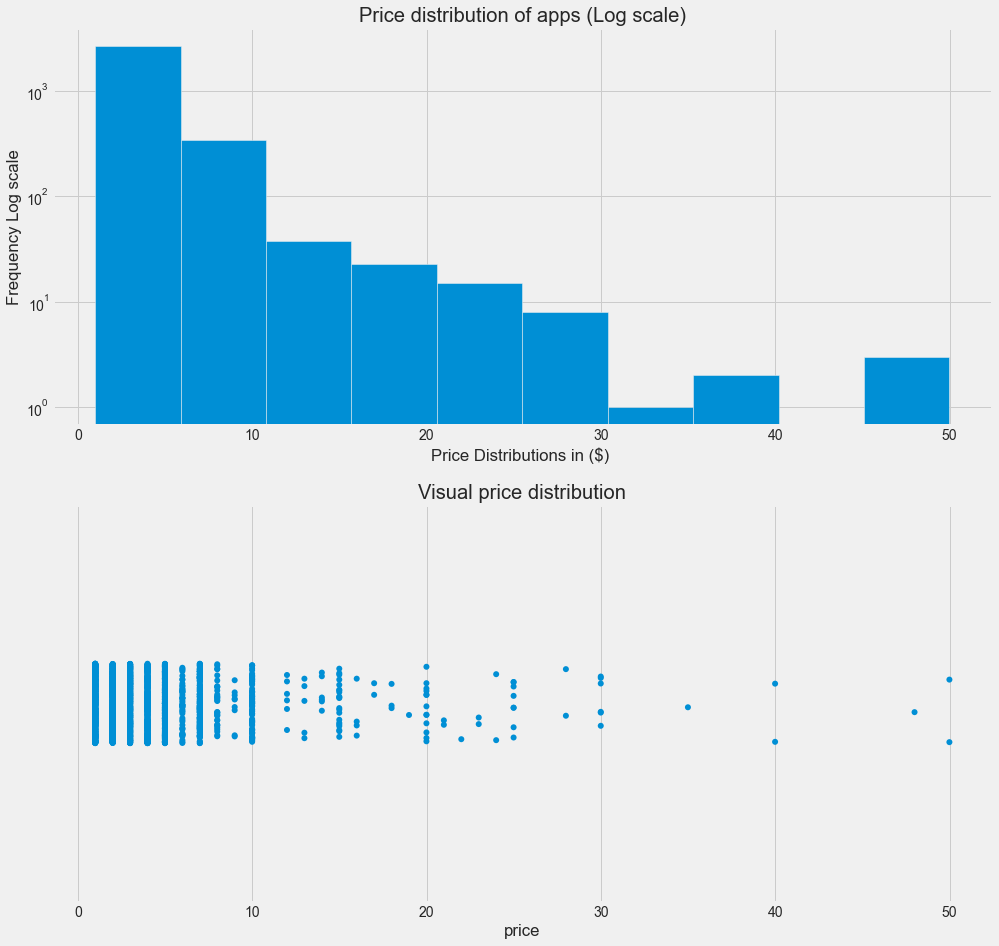

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)

plt.hist(paidapps.price,log=True)
plt.title('Price distribution of apps (Log scale)')
plt.ylabel("Frequency Log scale")
plt.xlabel("Price Distributions in ($) ")

plt.subplot(2,1,2)
plt.title('Visual price distribution')
sns.stripplot(data=paidapps,y='price',jitter= True,orient = 'h' ,size=6)
plt.show()

## 2.  The price distribution get affected by category 



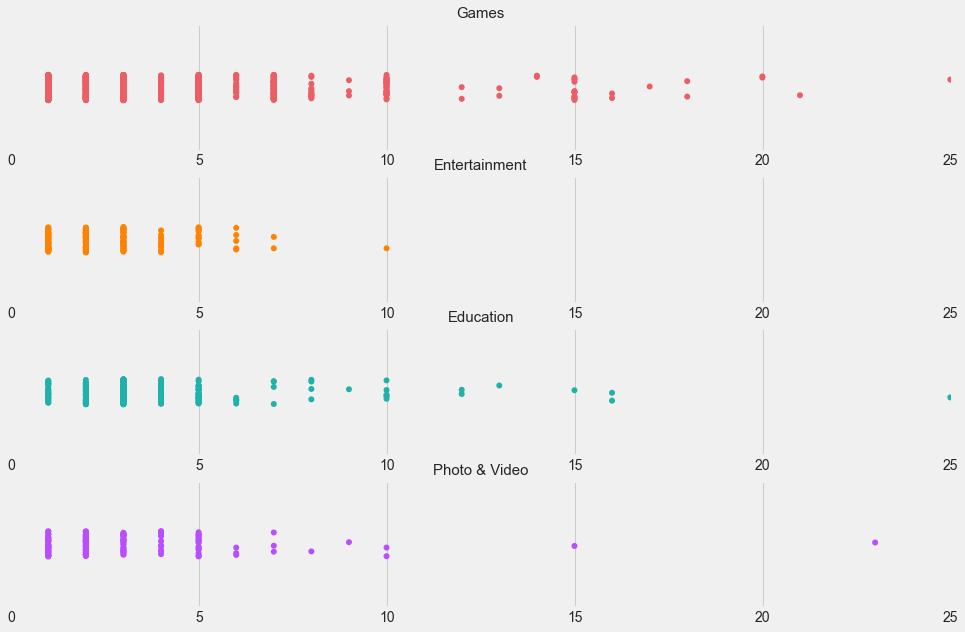

In [23]:
yrange = [0,25]
fsize =15

plt.figure(figsize=(15,10))

plt.subplot(4,1,1)
plt.xlim(yrange)
games = paidapps[paidapps.prime_genre=='Games']
sns.stripplot(data=games,y='price',jitter= True , orient ='h',size=6,color='#eb5e66')
plt.title('Games',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,2)
plt.xlim(yrange)
ent = paidapps[paidapps.prime_genre=='Entertainment']
sns.stripplot(data=ent,y='price',jitter= True ,orient ='h',size=6,color='#ff8300')
plt.title('Entertainment',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,3)
plt.xlim(yrange)
edu = paidapps[paidapps.prime_genre=='Education']
sns.stripplot(data=edu,y='price',jitter= True ,orient ='h' ,size=6,color='#20B2AA')
plt.title('Education',fontsize=fsize)
plt.xlabel('') 

plt.subplot(4,1,4)
plt.xlim(yrange)
pv = paidapps[paidapps.prime_genre=='Photo & Video']
sns.stripplot(data=pv,y='price',jitter= True  ,orient ='h',size=6,color='#b84efd')
plt.title('Photo & Video',fontsize=fsize)
plt.xlabel('') 

plt.show()

## 3.  Paid apps Vs Free apps 


In [24]:
print("There are total of " + str(len(data.prime_genre.value_counts().index)) 
      + " categories which is little too much")
print ("Lets limit our categories to 5")

There are total of 23 categories which is little too much
Lets limit our categories to 5


In [25]:
# reducing the number of categories

s = data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

data['broad_genre']= data.prime_genre.apply(lambda x : categ(x))

In [26]:
free = data[data.price==0].broad_genre.value_counts().sort_index().to_frame()
paid = data[data.price>0].broad_genre.value_counts().sort_index().to_frame()
total = data.broad_genre.value_counts().sort_index().to_frame()
free.columns=['free']
paid.columns=['paid']
total.columns=['total']
dist = free.join(paid).join(total)
dist ['paid_per'] = dist.paid*100/dist.total
dist ['free_per'] = dist.free*100/dist.total
dist

,free,paid,total,paid_per,free_per
Education,132,321,453,70.860927,29.139073
Entertainment,334,201,535,37.570093,62.429907
Games,2257,1605,3862,41.558778,58.441222
Others,1166,832,1998,41.641642,58.358358
Photo & Video,167,182,349,52.148997,47.851003


In [27]:
list_free= dist.free_per.tolist()
tuple_free = tuple(list_free)
tuple_paidapps = tuple(dist.paid_per.tolist())

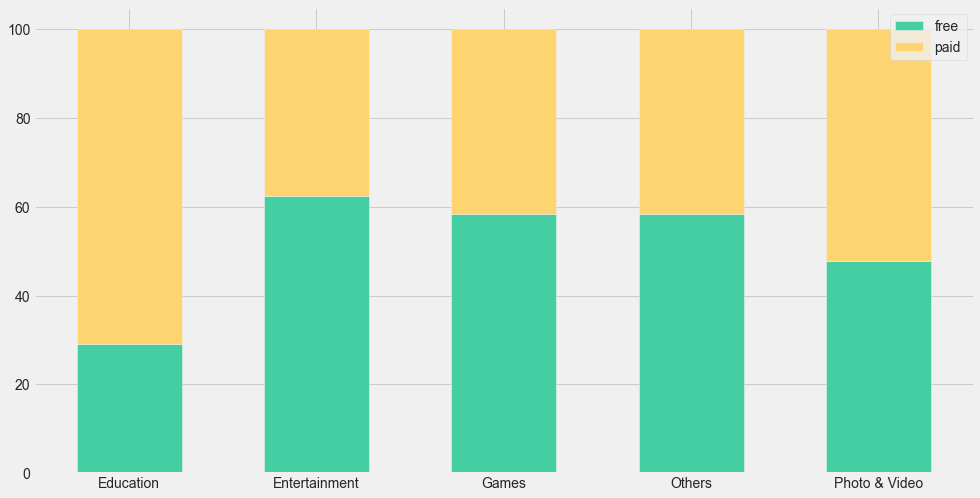

In [28]:
plt.figure(figsize=(15,8))
N=5
ind = np.arange(N)    # the x locations for the groups
width =0.56   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, tuple_free, width, color='#45cea2')
p2 = plt.bar(ind, tuple_paidapps, width,bottom=tuple_free,color='#fdd470')
plt.xticks(ind,tuple(dist.index.tolist() ))
plt.legend((p1[0], p2[0]), ('free', 'paid'))
plt.show()
# for pie chart
pies = dist[['free_per','paid_per']]
pies.columns=['free %','paid %']
plt.show()

<Figure size 1080x576 with 0 Axes>

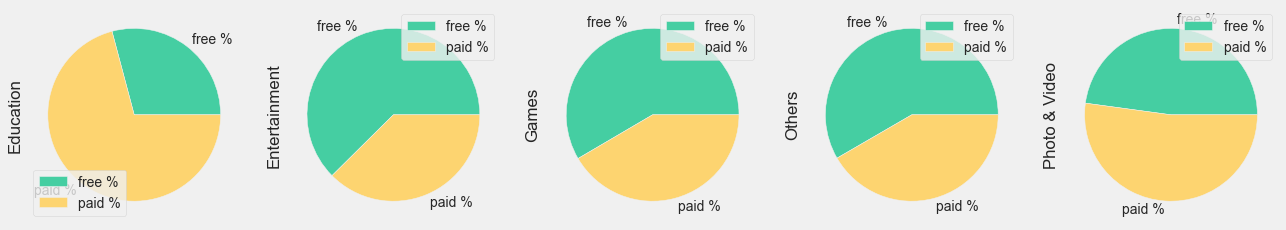

In [29]:
plt.figure(figsize=(15,8))
pies.T.plot.pie(subplots=True,figsize=(20,4),colors=['#45cea2','#fdd470'])
plt.show()

## 4. Paid apps good enough ?

In [30]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

data['category']= data.price.apply(lambda x : paid(x))
data.tail()


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,broad_genre,category
7192,11081,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Games,Free
7193,11082,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,Games,Free
7194,11087,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,Others,Paid
7195,11089,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,Games,Free
7196,11097,1188375727,Escape the Sweet Shop Series,90898432,USD,0.00,3,3,5.0,5.0,1.0,4+,Games,40,0,2,1,Games,Free


C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\HP\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensiona

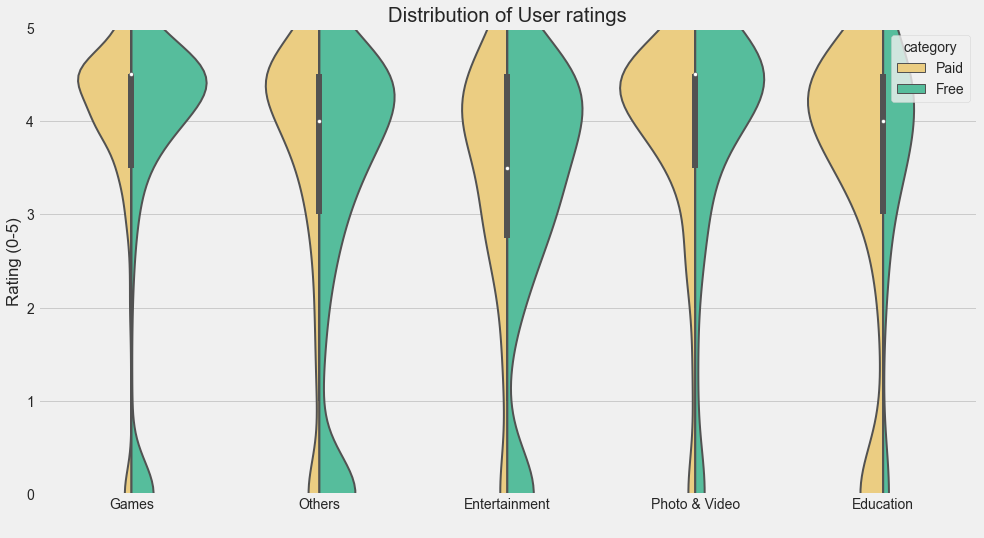

In [31]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
plt.title("Distribution of User ratings")
sns.violinplot(data=data, y ='user_rating',x='broad_genre',hue='category',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#fdd470','#45cea2'])
plt.xlabel(" ")
plt.ylabel("Rating (0-5)")

plt.show()

#### Why cant we use swarm plot ? 
 - Swarm is a non overlap plot i.e it will plot each point seperately on the graph.
 - If the number of points on particular value is a lot - lets say 100.
 - It will have to plot each value seperately on the graph
 - the graph will expand horizontally 

## 5. The size of the app increases do they get pricier ?


D:\DHRUVIN\Study\Anaconda\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


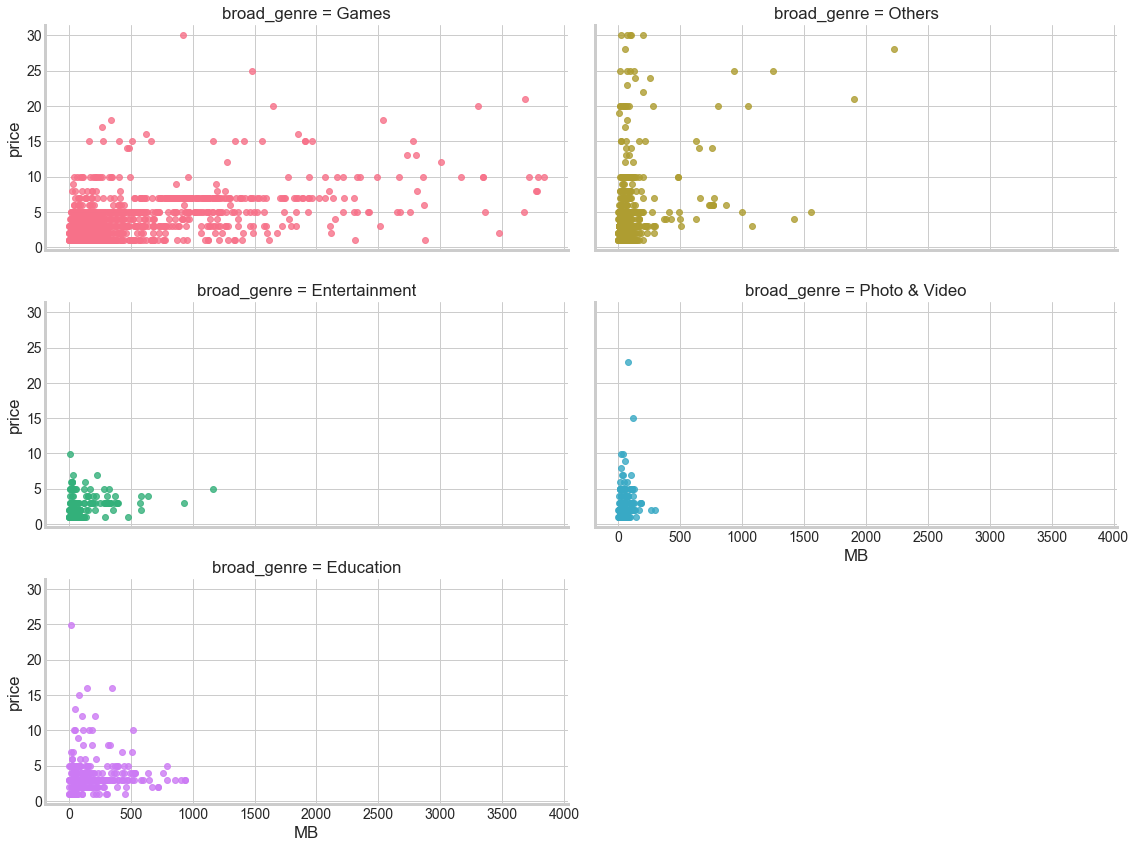

In [32]:
sns.color_palette("husl", 8)
sns.set_style("whitegrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
data ['MB']= data.size_bytes.apply(lambda x : x/1048576)
paidapps_regression =data[((data.price<30) & (data.price>0))]
sns.lmplot(data=paidapps_regression,
           x='MB',y='price',size=4, aspect=2,col_wrap=2,hue='broad_genre',
           col='broad_genre',fit_reg=False,palette = sns.color_palette("husl", 5))
plt.show()

#### Answer : NO ! 

## 6.  The apps distributed category wise and split by paid category 

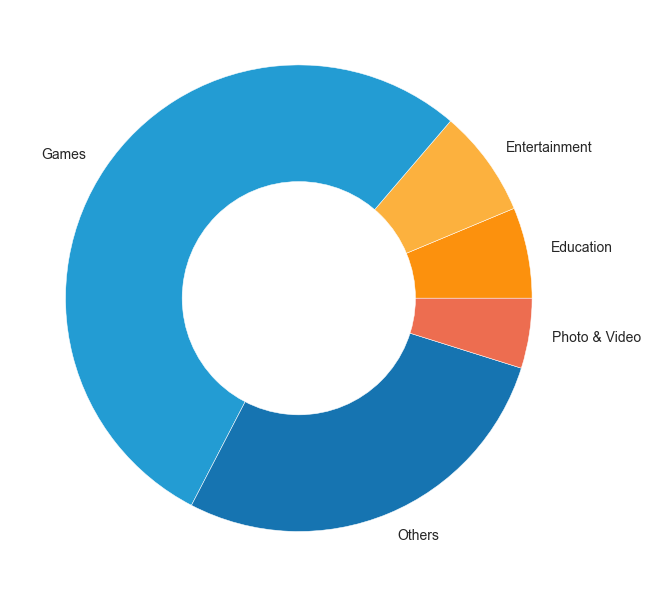

In [35]:
BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(10,10))
label_names=data.broad_genre.value_counts().sort_index().index
size = data.broad_genre.value_counts().sort_index().tolist()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=label_names, colors=BlueOrangeWapang)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

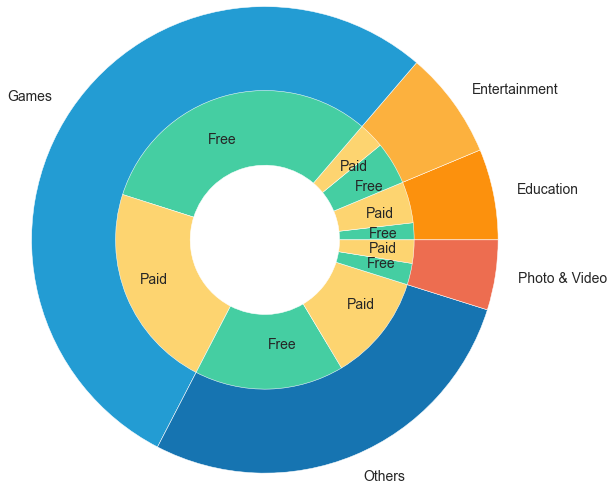

In [34]:
plt.figure(figsize=(10,10))
f=pd.DataFrame(index=np.arange(0,10,2),data=dist.free.values,columns=['num'])
p=pd.DataFrame(index=np.arange(1,11,2),data=dist.paid.values,columns=['num'])
final = pd.concat([f,p],names=['labels']).sort_index()
final.num.tolist()

plt.figure(figsize=(20,20))
group_names=data.broad_genre.value_counts().sort_index().index
group_size=data.broad_genre.value_counts().sort_index().tolist()
h = ['Free', 'Paid']
subgroup_names= 5*h
sub= ['#45cea2','#fdd470']
subcolors= 5*sub
subgroup_size=final.num.tolist()


# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=2.5, labels=group_names, colors=BlueOrangeWapang)
plt.setp( mypie, width=1.2, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.6, labels=subgroup_names, labeldistance=0.7, colors=subcolors)
plt.setp( mypie2, width=0.8, edgecolor='white')
plt.margins(0,0)

# show it
plt.show()
